<a target="_blank" href="https://colab.research.google.com/github/tomas-gajarsky/facetorch/blob/main/notebooks/facetorch_notebook_demo.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Facetorch notebook demo


## Check GPU availability

In [8]:
# Check GPU availability
!nvidia-smi
# Edit -> Notebook settings -> Hardware accelerator



Sun Feb  5 19:30:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    31W /  70W |   1538MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Add cell timer to the notebook

In [9]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.96 s (started: 2023-02-05 19:30:31 +00:00)


## Install dependencies

In [10]:
!python --version
!python -m pip install --upgrade pip
!python -m pip install facetorch>=0.2.1

!pip list | grep facetorch

Python 3.8.10
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
facetorch                     0.2.4
time: 9.99 s (started: 2023-02-05 19:30:34 +00:00)


## Download config and image

In [11]:
!wget -O ./test.jpg https://github.com/tomas-gajarsky/facetorch/blob/main/data/input/test.jpg?raw=true
!wget -O ./gpu.config.yml https://raw.githubusercontent.com/tomas-gajarsky/facetorch/main/conf/merged/gpu.merged.config.yaml

--2023-02-05 19:30:44--  https://github.com/tomas-gajarsky/facetorch/blob/main/data/input/test.jpg?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tomas-gajarsky/facetorch/raw/main/data/input/test.jpg [following]
--2023-02-05 19:30:44--  https://github.com/tomas-gajarsky/facetorch/raw/main/data/input/test.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tomas-gajarsky/facetorch/main/data/input/test.jpg [following]
--2023-02-05 19:30:44--  https://raw.githubusercontent.com/tomas-gajarsky/facetorch/main/data/input/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... con

## Import packages

In [12]:
from facetorch import FaceAnalyzer
from omegaconf import OmegaConf
from torch.nn.functional import cosine_similarity
from typing import Dict
import operator
import torchvision

time: 1.02 ms (started: 2023-02-05 19:30:44 +00:00)


## Configure

In [13]:
path_img_input="./test.jpg"
path_img_output="/test_output.jpg"
path_config="gpu.config.yml"


cfg = OmegaConf.load(path_config)

time: 83.3 ms (started: 2023-02-05 19:30:44 +00:00)


## Startup

In [14]:
# initialize
analyzer = FaceAnalyzer(cfg.analyzer)

# warmup
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=False,
        include_tensors=True,
        path_output=path_img_output,
    )

{"asctime": "2023-02-05 19:30:44,740", "levelname": "INFO", "message": "Initializing FaceAnalyzer"}
{"asctime": "2023-02-05 19:30:44,742", "levelname": "INFO", "message": "Initializing BaseReader"}
{"asctime": "2023-02-05 19:30:44,762", "levelname": "INFO", "message": "Initializing FaceDetector"}
{"asctime": "2023-02-05 19:30:45,086", "levelname": "INFO", "message": "Initializing FaceUnifier"}
{"asctime": "2023-02-05 19:30:45,114", "levelname": "INFO", "message": "Initializing FacePredictor objects"}
{"asctime": "2023-02-05 19:30:45,117", "levelname": "INFO", "message": "Initializing FacePredictor embed"}
{"asctime": "2023-02-05 19:30:45,319", "levelname": "INFO", "message": "Initializing FacePredictor verify"}
{"asctime": "2023-02-05 19:30:46,722", "levelname": "INFO", "message": "Initializing FacePredictor fer"}
{"asctime": "2023-02-05 19:30:46,965", "levelname": "INFO", "message": "Initializing FacePredictor deepfake"}
{"asctime": "2023-02-05 19:30:47,566", "levelname": "INFO", "mes

time: 17.1 s (started: 2023-02-05 19:30:44 +00:00)


## Inference

In [22]:
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=cfg.return_img_data,
        include_tensors=cfg.include_tensors,
        path_output=path_img_output,
    )

{"asctime": "2023-02-05 19:32:17,440", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2023-02-05 19:32:17,443", "levelname": "INFO", "message": "Reading image", "path_image": "./test.jpg"}
{"asctime": "2023-02-05 19:32:17,468", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2023-02-05 19:32:17,764", "levelname": "INFO", "message": "Number of faces: 4"}
{"asctime": "2023-02-05 19:32:17,766", "levelname": "INFO", "message": "Unifying faces"}
{"asctime": "2023-02-05 19:32:17,770", "levelname": "INFO", "message": "Predicting facial features"}
{"asctime": "2023-02-05 19:32:17,773", "levelname": "INFO", "message": "Running FacePredictor: embed"}
{"asctime": "2023-02-05 19:32:17,786", "levelname": "INFO", "message": "Running FacePredictor: verify"}
{"asctime": "2023-02-05 19:32:17,811", "levelname": "INFO", "message": "Running FacePredictor: fer"}
{"asctime": "2023-02-05 19:32:17,868", "levelname": "INFO", "message": "Running FacePredictor: deepfake"}
{"

time: 616 ms (started: 2023-02-05 19:32:17 +00:00)


## Output image

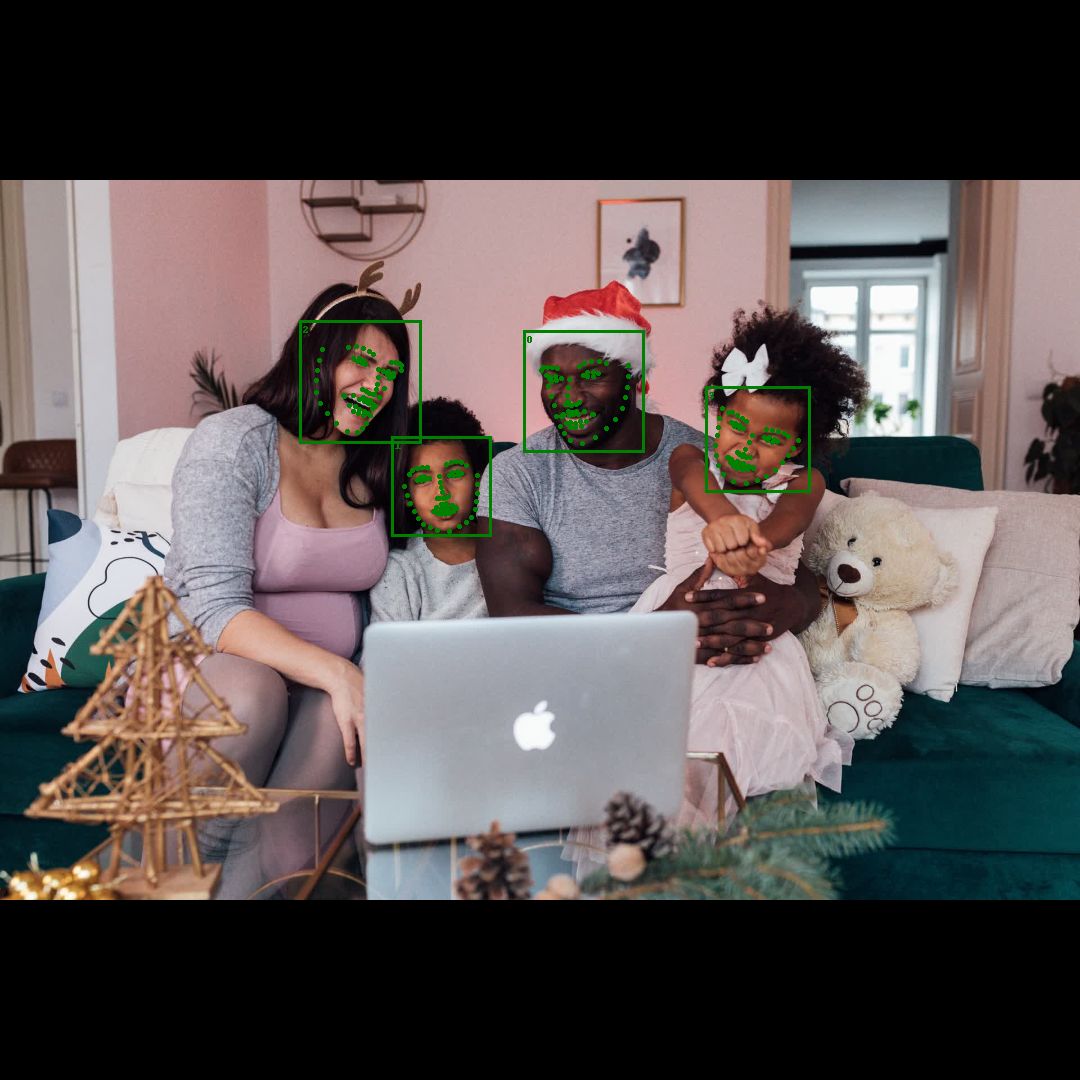

time: 238 ms (started: 2023-02-05 19:32:19 +00:00)


In [23]:
pil_image = torchvision.transforms.functional.to_pil_image(response.img)
pil_image

## Facial Expressions

In [24]:
{face.indx: face.preds["fer"].label for face in response.faces}


{0: 'Happiness', 1: 'Surprise', 2: 'Happiness', 3: 'Disgust'}

time: 3.46 ms (started: 2023-02-05 19:32:19 +00:00)


## Embedding cosine similarity

In [25]:
def compute_embed_similarity(predictor_name: str = "verify", base_face_id: int = 0) -> Dict:
  base_emb = response.faces[base_face_id].preds[predictor_name].logits
  sim_dict = {face.indx: cosine_similarity(base_emb, face.preds[predictor_name].logits, dim=0).item() for face in response.faces}
  sim_dict_sorted = dict(sorted(sim_dict.items(), key=operator.itemgetter(1),reverse=True))
  return sim_dict_sorted

time: 1.49 ms (started: 2023-02-05 19:32:21 +00:00)


### Face representation learning

In [26]:
compute_embed_similarity(predictor_name="embed")

{0: 1.0,
 3: 0.012771518900990486,
 2: -0.012598775327205658,
 1: -0.012680798768997192}

time: 4.26 ms (started: 2023-02-05 19:32:22 +00:00)


### Face verification

In [27]:
compute_embed_similarity(predictor_name="verify")

{0: 1.0000001192092896,
 1: 0.11373738944530487,
 3: 0.07457146048545837,
 2: -0.06798631697893143}

time: 4.28 ms (started: 2023-02-05 19:32:24 +00:00)


## Full response

In [28]:
response

ImageData(path_input='./test.jpg', path_output='/test_output.jpg', img=tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), tensor=tensor([[[[-104., -104., -104.,  ..., -104., -104., -104.],
          [-104., -104., -104.,  ..., -104., -104., -104.],
          [-104., -104., -104.,  ..., -104., -104., -104.],
          ...,
          [-104., -104., -104

time: 127 ms (started: 2023-02-05 19:32:26 +00:00)


time: 189 ms (started: 2023-02-05 19:31:54 +00:00)
